# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Изучение общей информации. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/datasets/real_estate_data.csv", sep = '\t')

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В датафрейме отсутсвуют данные в следующих столбцах:
- ceiling_height          14504 non-null float64
- floors_total            23613 non-null float64
- living_area             21796 non-null float64
- floor                   23699 non-null int64
- is_apartment            2775 non-null object
- kitchen_area            21421 non-null float64
- balcony                 12180 non-null float64
- locality_name           23650 non-null object
- airports_nearest        18157 non-null float64
- cityCenters_nearest     18180 non-null float64
- parks_around3000        18181 non-null float64
- parks_nearest           8079 non-null float64
- ponds_around3000        18181 non-null float64
- ponds_nearest           9110 non-null float64
- days_exposition         20518 non-null float64

Тип данных можно поменять для следующих столбцов в int:
- floors_total (число этажей)
- balcony (число балконов)
- parks_around3000 (число парков в радиусе 3 км)
- ponds_around3000 (число водоёмов в радиусе 3 км)

### Шаг 2. Предобработка данных

##### Замена пропусков в стоблце балконов на "0", потому что они отсутствуют.

In [4]:
data['balcony'] = data['balcony'].fillna(value = 0)

display(data['balcony'].value_counts())
display(data.head(10))

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


##### Замена пропусков в ceiling_height  на медиану с группировкой locality_name 

In [5]:
data['ceiling_height'] = (
    data['ceiling_height']
    .fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))
)
display(data['ceiling_height'].value_counts())

2.70     7818
2.50     4160
2.60     2136
2.55     1572
2.75     1121
         ... 
2.34        1
4.14        1
22.60       1
4.30        1
5.50        1
Name: ceiling_height, Length: 195, dtype: int64

##### Измененение типа данных balcony

In [6]:
data['balcony'] = data['balcony'].astype('int')

#### Вывод:
1. Выполнена замена пропусков на 0 поменяли тип данных в 'balcony';
2. Выполнена замена данных на median в 'ceiling_height';


### Шаг 3.Расчет и добавление новых данных

In [7]:
#добавление в таблицу: цена квадратного метра

data['price_squere_meter'] = (data['last_price'] / data['living_area'])
#data['price_squere_meter'] = data['price_squere_meter'].astype('int')
display(data['price_squere_meter'])

#добавление в таблицу: день недели, месяц и год публикации объявления

data['month_year_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['weekday'] = data['month_year_exposition'].dt.weekday
data['weekday_name'] = data['month_year_exposition'].dt.day_name()
data['month'] = data['month_year_exposition'].dt.month
data['month_name'] = data['month_year_exposition'].dt.month_name()
data['year'] = data['month_year_exposition'].dt.year


#добавление в таблицу: этаж квартиры; варианты — первый, последний, другой
 
display(data['floor'].max())

def floor(row):
    name_floor = row['floor']
    if name_floor == 1:
        return "первый"
    if name_floor == row['floors_total']:
        return "последний"
    return "другой"

data['new_floor'] = data.apply(floor, axis = 1)
print(data['new_floor'].value_counts())





0        254901.960784
1        180107.526882
2        151486.880466
3                  NaN
4        312500.000000
             ...      
23694    132332.878581
23695     81578.947368
23696     84175.084175
23697              NaN
23698    109756.097561
Name: price_squere_meter, Length: 23699, dtype: float64

33

другой       17446
последний     3336
первый        2917
Name: new_floor, dtype: int64


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

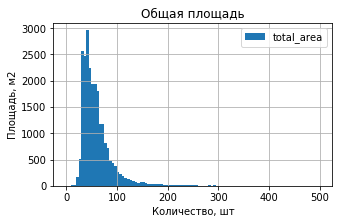

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

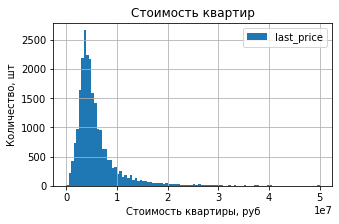

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

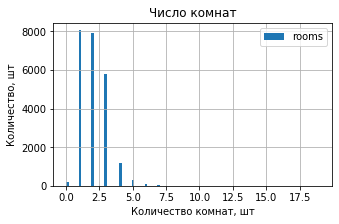

count    23543.000000
mean         2.734102
std          1.012723
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

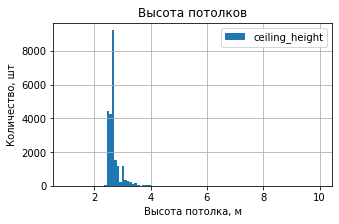

23699

In [8]:
#изучение следующих параметров: площадь, цена, число комнат, высота потолков
#и построение гистограммы для каждого параметра

#площадь
display(data['total_area'].describe())
data.plot(y='total_area', kind='hist', grid = True, bins=100,  figsize = (5,3), range = (0,500))
plt.title('Общая площадь')
plt.xlabel('Количество, шт')
plt.ylabel('Площадь, м2')
plt.show()

#цена
display(data['last_price'].describe())
data.plot(y='last_price', kind='hist', grid = True, bins=100,  figsize = (5,3), range = (0,50000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость квартиры, руб')
plt.ylabel('Количество, шт')
plt.show()

#число комнат
display(data['rooms'].describe())
data.plot(y='rooms', kind='hist', grid = True, bins=100,  figsize = (5,3), range = (0,19))
plt.title('Число комнат')
plt.xlabel('Количество комнат, шт')
plt.ylabel('Количество, шт')
plt.show()

#высота потолков
display(data['ceiling_height'].describe())
data.plot(y='ceiling_height', kind='hist', grid = True, bins=100,  figsize = (5,3), range = (1,10))
plt.title('Высота потолков')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество, шт')
plt.show()


#display(data.pivot_table(index='locality_name', values='total_area'))
display(data['total_area'].count())

In [9]:
data.dtypes

total_images                      int64
last_price                      float64
total_area                      float64
first_day_exposition             object
rooms                             int64
ceiling_height                  float64
floors_total                    float64
living_area                     float64
floor                             int64
is_apartment                     object
studio                             bool
open_plan                          bool
kitchen_area                    float64
balcony                           int64
locality_name                    object
airports_nearest                float64
cityCenters_nearest             float64
parks_around3000                float64
parks_nearest                   float64
ponds_around3000                float64
ponds_nearest                   float64
days_exposition                 float64
price_squere_meter              float64
month_year_exposition    datetime64[ns]
weekday                           int64


##### Вывод:
1. Добавлены следующие столбцы: цена квадратного метраб день недели, месяц и год публикации объявления, этаж квартиры (варианты — первый, последний, другой);
2. Параметры (площадь, цена, число комнат, высота потолков) имеют вид нормального распределния.

### Шаг 4. Исследовательский анализ данных

#### 1. Изучение времени продажи

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

'Количество пропусков - 3181.0'

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
       ... 
78.0     51
94.0     49
87.0     43
2.0       3
1.0       1
Name: days_exposition, Length: 100, dtype: int64

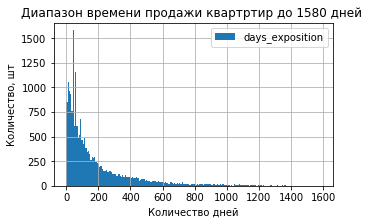

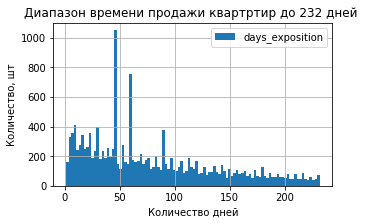

'Процент времени продаж за 513 дней - 91.9 %'

'Среденее время продажи квартир 180.9 дней'

'Медиана времени продажи квартир 95.0 дней'

In [10]:
display(data['days_exposition'].describe())
display("Количество пропусков - {:.1f}".format(data['days_exposition'].isnull().sum())) # отсутвует 3181 значений
display(data[data['days_exposition'] <= 100]['days_exposition'].value_counts())

# построение ящика с усами
#data.boxplot(column='days_exposition') # по графику виден выброс около 550 дней, определим правый ус подборкой 
#plt.ylim(0, 513) # диапазон выборки от 0 дней до 513 дней, все что больше 513 дней- дошгие продажи


#построение графиков для всего диапазона и для "ящика" 
data.plot(y='days_exposition', kind='hist', grid = True, bins=200,  figsize = (5,3), range = (0,1580))
plt.title('Диапазон времени продажи квартртир до 1580 дней ')
plt.xlabel('Количество дней')
plt.ylabel('Количество, шт')
plt.show()
data.plot(y='days_exposition', kind='hist', grid = True, bins=100,  figsize = (5,3), range = (1,232))
plt.title('Диапазон времени продажи квартртир до 232 дней ')
plt.xlabel('Количество дней')
plt.ylabel('Количество, шт')
plt.show()

#процент количества продаж до 513 дней
percent_days = data[data['days_exposition'] <= 513]['days_exposition'].count()/data['days_exposition'].count()*100
display("Процент времени продаж за 513 дней - {:.1f} %".format(percent_days))


#расчет медианы и среднего времени продаж квартир
display('Среденее время продажи квартир {:.1f} дней'.format(data['days_exposition'].mean()))
display('Медиана времени продажи квартир {:.1f} дней'.format(data['days_exposition'].median()))

##### Вывод:
1. Аномальное время продажи квартир (количество дней) - 7, 30, 45, 60, 90.
2. Количество квардир проданных 513 дней стоставляет 91.9 % от всех продаж.
3. Среденее время продажи квартир 180.9 дней.
4. Медиана времени продажи квартир 95.0 дней.
5. Предлагаю, что квартиры продающийся более 513 дней, будут считаться долгими.

### Удаление редких и выбивающиеся значений

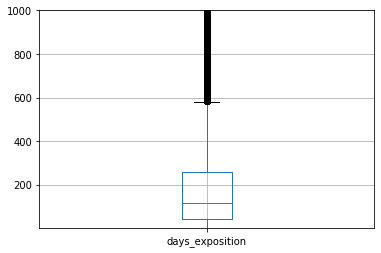

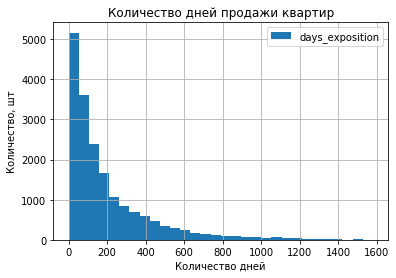

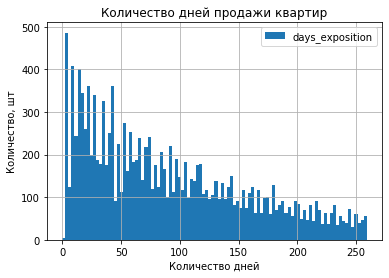

'Процент времени продаж за 513 дней - 70.8 %'

'Среденее время продажи квартир 195.8 дней'

'Медиана времени продажи квартир 114.0 дней'

In [11]:
#получение нового датафрейма days_data без редких и выбивающихся данных
days_data = data.query('days_exposition != (7, 30, 45.0, 60, 90)') # остаются значения 45 и 90

# выполним замену пропусков на "9999" для перевода формата int
data['days_exposition'] = data['days_exposition'].fillna(value = 0).astype('int')

#повторное получение нового датафрейма days_data без редких и выбивающихся данных
days_data = data.query('days_exposition != (0, 7, 30, 45.0, 60, 90)') # все получилось

#диаграмма размаха для нового days_data
days_data.boxplot(column='days_exposition')
plt.ylim(1,1000)
plt.show()

#гистограммы
days_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (0,1580))
plt.title('Количество дней продажи квартир')
plt.xlabel('Количество дней')
plt.ylabel('Количество, шт')
plt.show()

days_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (0,259))
plt.title('Количество дней продажи квартир')
plt.xlabel('Количество дней')
plt.ylabel('Количество, шт')
plt.show()

#Числовое описание данных для 'days_exposition'
days_data['days_exposition'].describe()

#процент количества продаж до 600 дней
percent_days = days_data[days_data['days_exposition'] <= 513]['days_exposition'].count()/data['days_exposition'].count()*100
display("Процент времени продаж за 513 дней - {:.1f} %".format(percent_days))

#расчет медианы и среднего времени продаж квартир
display('Среденее время продажи квартир {:.1f} дней'.format(days_data['days_exposition'].mean()))
display('Медиана времени продажи квартир {:.1f} дней'.format(days_data['days_exposition'].median()))

##### Вывод:
1. Среднее время продажа квартир и медиана уменьшилась после очистки days_data от аномалий

### Определение факторов влияющие на стоимость квартир

##### Зависимость цены от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. 


Коэффициент корреляции Пирсона цены от общей площади 0.1


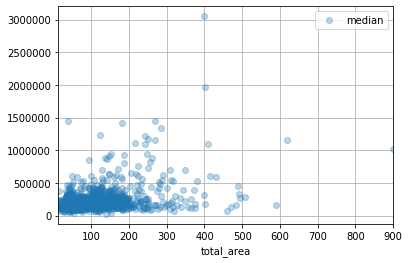

In [12]:
#Вычисление коэффициента корреляции Пирсона для price_squere_meter и 'total_area'
print('Коэффициент корреляции Пирсона цены от общей площади {:.1f}'.format(days_data['price_squere_meter'].corr(days_data['total_area'])))
squere_meter_area = days_data.pivot_table(index='total_area', values='price_squere_meter', aggfunc='median')
squere_meter_area.columns = ['median']
squere_meter_area.plot(y='median', style = 'o', alpha=0.3, sharex=True, grid=True)
plt.show()

Коэффициент корреляции Пирсона цены от количества комнат -0.1


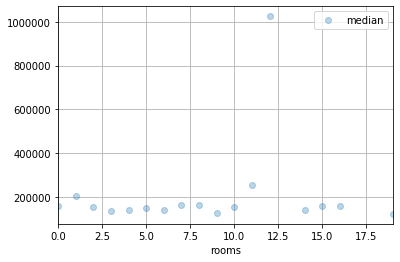

In [13]:
#Вычисление коэффициента корреляции Пирсона для last_price и 'rooms'
print('Коэффициент корреляции Пирсона цены от количества комнат {:.1f}'.format(days_data['price_squere_meter'].corr(days_data['rooms'])))
squere_meter_rooms = days_data.pivot_table(index='rooms', values='price_squere_meter', aggfunc='median')
squere_meter_rooms.columns = ['median']
squere_meter_rooms.plot(y='median', style = 'o', alpha=0.3, sharex=True, grid=True)
plt.show()

Коэффициент корреляции Пирсона цены от этажа 0.1


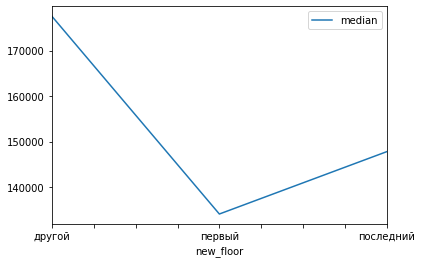

In [14]:
#Вычисление коэффициента корреляции Пирсона для last_price и 'new_floor'
#коэффициент кореляции Пиросна не работает с форматом str, поэтому рассмотрим хотя бы от 'floor'
print('Коэффициент корреляции Пирсона цены от этажа {:.1f}'.format(days_data['price_squere_meter'].corr(days_data['floor'])))
squere_meter_floor = days_data.pivot_table(index='new_floor', values='price_squere_meter', aggfunc='median')
squere_meter_floor.columns = ['median']
squere_meter_floor.plot(y='median')
plt.show()

Коэффициент корреляции Пирсона цены от удаленности от центра -0.1


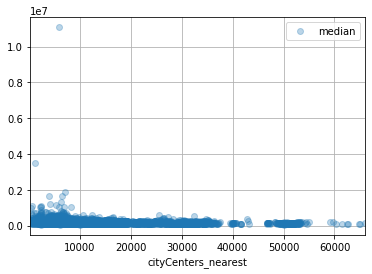

In [15]:
#Вычисление коэффициента корреляции Пирсона для last_price и 'cityCenters_nearest'
print('Коэффициент корреляции Пирсона цены от удаленности от центра {:.1f}'.format(days_data['price_squere_meter'].corr(days_data['cityCenters_nearest'])))
squere_meter_city = days_data.pivot_table(index='cityCenters_nearest', values='price_squere_meter', aggfunc='median')
squere_meter_city.columns = ['median']
squere_meter_city.plot(y='median', style = 'o', alpha=0.3, sharex=True, grid=True)
plt.show()

##### Зависимость цены от даты размещения: дня недели, месяца и года.

Коэффициент корреляции Пирсона цены от дня недели -0.0


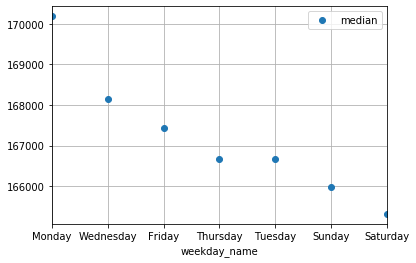

,mean,count,median
weekday_name,,,
Monday,186298.334694,2598,170184.917010
Wednesday,183411.455199,2865,168141.592920
Friday,183160.372057,3017,167441.860465
Thursday,187092.723299,3240,166666.666667
Tuesday,193226.197358,3078,166666.666667
Sunday,182965.260417,1195,165975.103734
Saturday,186000.539579,1367,165316.045381


In [16]:
#Вычисление коэффициента корреляции Пирсона для price_squere_meter и 'weekday'
print('Коэффициент корреляции Пирсона цены от дня недели {:.1f}'.format(days_data['price_squere_meter'].corr(days_data['weekday'])))
squere_meter_weekday = days_data.pivot_table(index='weekday_name', values='price_squere_meter', aggfunc=['mean', 'count', 'median'])
squere_meter_weekday.columns = ['mean', 'count', 'median']
squere_meter_weekday.sort_values('median', ascending = False).plot(y='median', style = 'o', sharex=True, grid=True)
plt.show()
display(squere_meter_weekday.sort_values('median', ascending = False))


Коэффициент корреляции Пирсона цены от месяца 0.0


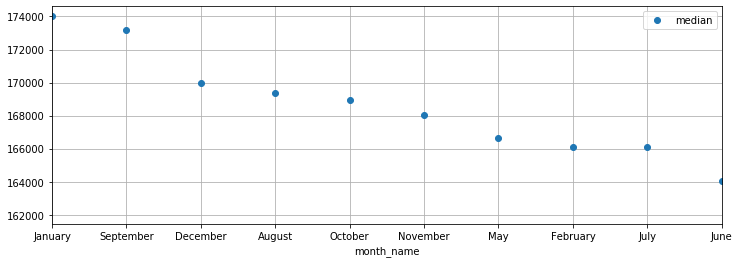

,mean,count,median
month_name,,,
January,189535.638498,1051,174008.810573
September,189874.647248,1614,173157.804016
December,190714.197375,1111,170000.000000
August,184498.047500,1379,169398.907104
October,182394.797354,1705,168965.517241
November,194427.710004,1877,168067.226891
May,184025.527212,990,166666.666667
February,185485.309591,1882,166129.032258
July,186652.854214,1325,166129.032258


In [17]:
#Вычисление коэффициента корреляции Пирсона для price_squere_meter и 'month'
print('Коэффициент корреляции Пирсона цены от месяца {:.1f}'.format(days_data['price_squere_meter'].corr(days_data['month'])))
squere_meter_month = days_data.pivot_table(index='month_name', values='price_squere_meter', aggfunc=['mean', 'count', 'median'])
squere_meter_month.columns = ['mean', 'count', 'median']
(
    squere_meter_month.sort_values('median', ascending = False)
    .plot(y='median', style = 'o', grid=True, xlim=(0, 9), figsize=(12, 4))
)
plt.show() #не получается вывести все месяцы
display(squere_meter_month.sort_values('median', ascending = False))

Коэффициент корреляции Пирсона цены от года -0.0


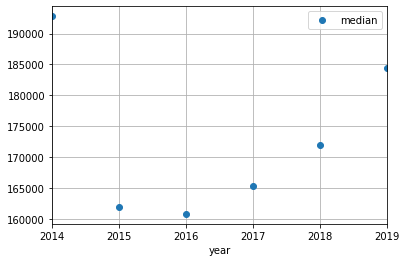

,mean,count,median
year,,,
2014,225948.381831,112,192803.088803
2019,197705.362662,870,184366.270950
2018,185343.445817,6018,172009.174312
2017,183508.884646,6820,165259.209745
2015,208068.955013,1058,161860.510155
2016,181923.581401,2482,160798.783236


In [18]:
#Вычисление коэффициента корреляции Пирсона для price_squere_meter и 'year'
print('Коэффициент корреляции Пирсона цены от года {:.1f}'.format(days_data['price_squere_meter'].corr(days_data['year'])))
squere_meter_year = days_data.pivot_table(index='year', values='price_squere_meter', aggfunc=['mean', 'count', 'median'])
squere_meter_year.columns = ['mean', 'count', 'median']
(
    squere_meter_year.sort_values('median', ascending = False)
    .plot(y='median', style = 'o', grid=True)
)
plt.show() 
display(squere_meter_year.sort_values('median', ascending = False))

#### Вывод
1. Факторы влияющие на стоиомсть квартиры по коээфициенту корреляции Пирсона не обнаружен;
2. По графику цена квадратного метра от этажа квартиры (первый, последний и другой) видно, что стоимость последнего этажа дороже первого, но другие этажи дороже последних этажей;
3. Высокая стоимость квадратного метра квартиры в понедельник и в январе, возможно связано оптимистичным настроением людей.

### Вычисление 10 населённых пунктов с наибольшим числом объявлений

In [19]:
#Сводная таблиц населённых пунктов
squere_meter_locality = days_data.pivot_table(index='locality_name', values='price_squere_meter', aggfunc=["count", 'mean'])
squere_meter_locality.columns = ['count', 'mean']

#сортивка по уменьшению с наибольшого числа объявлений
squere_meter_locality = squere_meter_locality.sort_values('count', ascending = False)
squere_meter_locality = squere_meter_locality[:10]

# min и max стоимость жилья в 10 населённых пунктов с наибольшим числом объявлений
locality_min = squere_meter_locality['mean'].min()
locality_max = squere_meter_locality['mean'].max()
print(squere_meter_locality)


                   count           mean
Санкт-Петербург    11714  211784.432043
посёлок Мурино       423  177472.166309
посёлок Шушары       339  156354.972134
Всеволожск           297  134225.805559
Колпино              270  131621.215675
Пушкин               266  191537.405545
посёлок Парголово    247  201783.199788
деревня Кудрово      243  188057.846212
Гатчина              233  119868.272147
Петергоф             159  145486.258309


/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/pivot.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


#### Вывод

Наибольшее число объявленией продажи квартир и самая высокая средняя стоимость квадратного метра находяться в г.Санкт-Петербург.  

### Изучение предложение квартир

61

15660

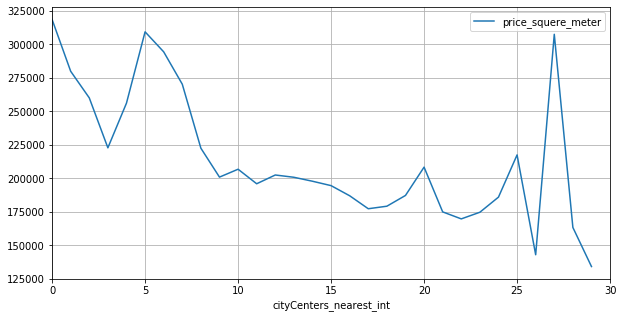

In [20]:
#Выделение квартиры в Санкт-Петербурге 'locality_name' в data_saint_peter 

data_saint_peter = data.query('locality_name == "Санкт-Петербург"')
#display(data_saint_peter['locality_name'])


#Создание столбца с расстоянием до центра в километрах: округление до целых значений.

#Проверка на пропуски
display(data_saint_peter['cityCenters_nearest'].isnull().sum()) #сумма пропусков - 61
display(data_saint_peter['cityCenters_nearest'].count()) #количество квартир в Санкт-Петербурге
# Дроп квартиры с пропуками, потому что их очень мало
data_saint_peter = data_saint_peter.dropna(subset = ['cityCenters_nearest'])
#display(data_saint_peter['cityCenters_nearest'].isnull().sum())
#display(data_saint_peter['cityCenters_nearest'].count()) #почему-то количество квартир осталось прежним!!?

#перевод в км и округление до целых чисел форматом int
data_saint_peter['cityCenters_nearest_int'] = data_saint_peter['cityCenters_nearest'] / 1000
data_saint_peter['cityCenters_nearest_int'] = data_saint_peter['cityCenters_nearest_int'].astype('int')
#data_saint_peter.info()  #успешно проведено форматирование

# Стоимость километра
price_km_saint_peter = data_saint_peter.pivot_table(index = 'cityCenters_nearest_int', values = 'price_squere_meter', aggfunc = 'mean')
price_km_saint_peter.plot(grid=True, xlim=(0, 30), figsize=(10, 5))

#### Вывод
Средняя стоимость для каждого киломентра сильно меняется на 3 км и потом возрастает. 
Центральная зона будет считаться радиусом 3 км от центра города.

### Выделение сегмента квартир в центре

#### Факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра)

In [21]:
#Выделение квартиры центральной зоне в Санкт-Петербурге 'locality_name' в data_saint_peter_3km
data_saint_peter_3km = data_saint_peter.query('cityCenters_nearest_int <= 3')
display(data_saint_peter_3km.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_squere_meter,month_year_exposition,weekday,weekday_name,month,month_name,year,new_floor,cityCenters_nearest_int
24,8,6500000.0,97.2,2015-10-31T00:00:00,2,2.70,3.0,46.5,1,NaN,...,265,139784.946237,2015-10-31,5,Saturday,10,October,2015,первый,2
35,6,15500000.0,149.0,2017-06-26T00:00:00,5,2.70,5.0,104.0,4,NaN,...,644,149038.461538,2017-06-26,0,Monday,6,June,2017,другой,3
99,32,9600000.0,90.0,2017-09-26T00:00:00,4,2.70,5.0,67.0,2,NaN,...,104,143283.582090,2017-09-26,1,Tuesday,9,September,2017,другой,2
136,16,6500000.0,51.8,2018-08-01T00:00:00,2,3.45,6.0,25.6,2,NaN,...,163,253906.250000,2018-08-01,2,Wednesday,8,August,2018,другой,3
138,8,4800000.0,40.0,2017-11-18T00:00:00,2,2.70,3.0,29.0,2,NaN,...,80,165517.241379,2017-11-18,5,Saturday,11,November,2017,другой,2
154,1,8200000.0,80.0,2018-11-06T00:00:00,3,4.15,3.0,44.2,2,NaN,...,38,185520.361991,2018-11-06,1,Tuesday,11,November,2018,другой,3
155,8,96000000.0,317.0,2017-07-07T00:00:00,4,3.50,3.0,183.0,3,NaN,...,62,524590.163934,2017-07-07,4,Friday,7,July,2017,последний,1
179,5,14800000.0,108.7,2019-04-11T00:00:00,3,4.00,5.0,72.4,5,NaN,...,0,204419.889503,2019-04-11,3,Thursday,4,April,2019,последний,2
181,2,7900000.0,71.8,2017-08-23T00:00:00,3,3.00,5.0,38.7,1,NaN,...,0,204134.366925,2017-08-23,2,Wednesday,8,August,2017,первый,3
201,5,10880000.0,123.1,2015-11-12T00:00:00,6,3.20,5.0,89.0,2,NaN,...,992,122247.191011,2015-11-12,3,Thursday,11,November,2015,другой,3


Коэффициент корреляции Пирсона цены от комнат 0.2


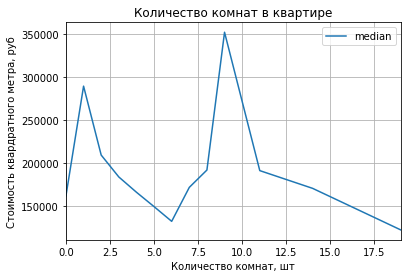

In [22]:
#Вычисление коэффициента корреляции Пирсона для price_squere_meter и 'rooms'
print('Коэффициент корреляции Пирсона цены от комнат {:.1f}'.format(data_saint_peter_3km['price_squere_meter'].corr(data_saint_peter_3km['total_area'])))
saint_peter_3km_area = data_saint_peter_3km.pivot_table(index='rooms', values='price_squere_meter', aggfunc=['mean', 'count', 'median'])
saint_peter_3km_area.columns = ['mean', 'count', 'median']
saint_peter_3km_area.plot(y='median', grid=True)
plt.title('Количество комнат в квартире')
plt.xlabel('Количество комнат, шт')
plt.ylabel('Стоимость квардратного метра, руб')
plt.show()

Стоимость квадратного метра до 6 комнат падает, но потом стоимость возрастает до 9 комнат.

Коэффициент корреляции Пирсона цены от комнат 0.2


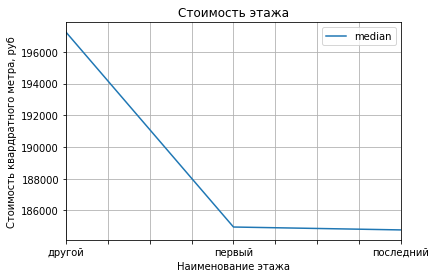

In [23]:
#Вычисление коэффициента корреляции Пирсона для price_squere_meter и 'floor'
#коэффициент кореляции Пиросна не работает с форматом str, поэтому рассмотрим хотя бы от 'floor'
print('Коэффициент корреляции Пирсона цены от комнат {:.1f}'.format(data_saint_peter_3km['price_squere_meter'].corr(data_saint_peter_3km['floor'])))
saint_peter_3km_floor = data_saint_peter_3km.pivot_table(index='new_floor', values='price_squere_meter', aggfunc=['mean', 'count', 'median'])
saint_peter_3km_floor.columns = ['mean', 'count', 'median']
saint_peter_3km_floor.plot(y='median', grid=True)
plt.title('Стоимость этажа')
plt.xlabel('Наименование этажа')
plt.ylabel('Стоимость квардратного метра, руб')
plt.show()

Самая высокоая стоимость квадратного метра у этажа "другой", стоимость первого и последнего этажа почти одинаково стоят.

Коэффициент корреляции Пирсона цены от удаленности от центра -0.1


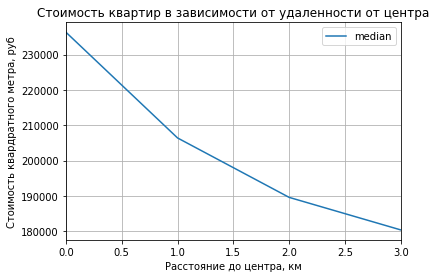

In [24]:
#Вычисление коэффициента корреляции Пирсона для last_price и 'cityCenters_nearest_int'
index_nearest_int = data_saint_peter_3km['price_squere_meter'].corr(data_saint_peter_3km['cityCenters_nearest_int'])
print('Коэффициент корреляции Пирсона цены от удаленности от центра {:.1f}'.format(index_nearest_int))
saint_peter_city = data_saint_peter_3km.pivot_table(index='cityCenters_nearest_int', values='price_squere_meter', aggfunc=['mean', 'count', 'median'])
saint_peter_city.columns = ['mean', 'count', 'median']
saint_peter_city.plot(y='median', grid=True)
plt.title('Стоимость квартир в зависимости от удаленности от центра')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Стоимость квардратного метра, руб')
plt.show()

Стоимость квадратного метра уменьшается с увеличением расстояния от квартиры до центра города.

#### Факторы, которые влияют на стоимость квартиры (дата размещения)

Коэффициент корреляции Пирсона цены от дня недели -0.0


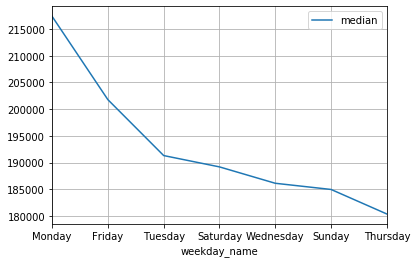

,mean,count,median
weekday_name,,,
Monday,252143.123647,159,217391.304348
Friday,235418.270451,199,201780.415430
Tuesday,265734.454866,178,191304.167005
Saturday,284776.216075,70,189181.286550
Wednesday,244108.201784,185,186111.111111
Sunday,243539.035799,63,184952.978056
Thursday,250801.301243,240,180352.342550


Коэффициент корреляции Пирсона цены от месяца -0.0


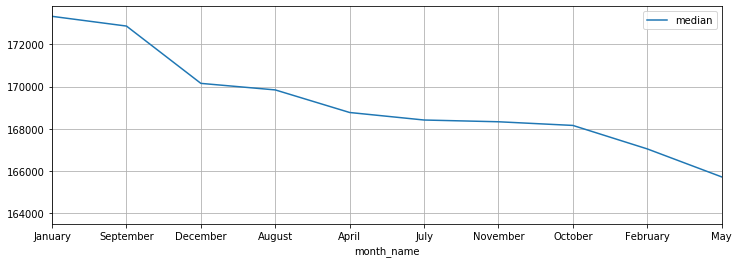

,mean,count,median
month_name,,,
January,190158.620557,1325,173333.333333
September,190025.121371,1889,172872.340426
December,190053.050346,1373,170157.068063
August,184903.364222,1611,169847.328244
April,189358.283511,2222,168777.055488
July,187766.381660,1545,168421.052632
November,193729.150286,2255,168338.108883
October,183174.438589,2026,168164.588529
February,187549.533052,2379,167052.023121


Коэффициент корреляции Пирсона цены от года 0.0


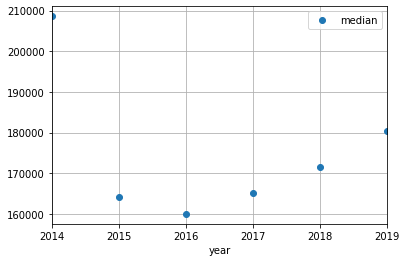

,mean,count,median
year,,,
2014,237258.632550,130,208608.159393
2019,198398.789188,2689,180412.371134
2018,185068.892858,7527,171428.571429
2017,183454.845424,7660,165077.290293
2015,212152.941040,1123,164179.104478
2016,182068.207858,2667,160000.000000


In [25]:
#Вычисление коэффициента корреляции Пирсона для price_squere_meter и 'weekday'
print('Коэффициент корреляции Пирсона цены от дня недели {:.1f}'.format(data_saint_peter_3km['price_squere_meter'].corr(data_saint_peter_3km['weekday'])))
saint_peter_weekday = data_saint_peter_3km.pivot_table(index='weekday_name', values='price_squere_meter', aggfunc=['mean', 'count', 'median'])
saint_peter_weekday.columns = ['mean', 'count', 'median']
saint_peter_weekday.sort_values('median', ascending = False).plot(y='median', sharex=True, grid=True)
plt.show()
display(saint_peter_weekday.sort_values('median', ascending = False))

#Вычисление коэффициента корреляции Пирсона для price_squere_meter и 'month'
print('Коэффициент корреляции Пирсона цены от месяца {:.1f}'.format(data_saint_peter_3km['price_squere_meter'].corr(data_saint_peter_3km['month'])))
saint_peter_month = data.pivot_table(index='month_name', values='price_squere_meter', aggfunc=['mean', 'count', 'median'])
saint_peter_month.columns = ['mean', 'count', 'median']
(
    saint_peter_month.sort_values('median', ascending = False)
    .plot(y='median', grid=True, xlim=(0, 9), figsize=(12, 4))
)
plt.show() #не получается вывести все месяцы
display(saint_peter_month.sort_values('median', ascending = False))

#Вычисление коэффициента корреляции Пирсона для price_squere_meter и 'year'
print('Коэффициент корреляции Пирсона цены от года {:.1f}'.format(data_saint_peter_3km['price_squere_meter'].corr(data_saint_peter_3km['year'])))
saint_peter_year = data.pivot_table(index='year', values='price_squere_meter', aggfunc=['mean', 'count', 'median'])
saint_peter_year.columns = ['mean', 'count', 'median']
(
    saint_peter_year.sort_values('median', ascending = False)
    .plot(y='median', style = 'o', grid=True)
)
plt.show() 
display(saint_peter_year.sort_values('median', ascending = False))

#### Вывод:
1. Факторы влияющие в центре города на стоиомсть квартиры по коэффициенту корреляции Пирсона не обнаружен;
2. Стоимость квадратного метра с однокомнатной до 5-ти комнатой квартиры уменьшается;
3. Стоимость первого и последнего этажа почти одинаково стоит, в отличие от всего города;
4. Чем дальше квартира от центра города, тем дешевле;


### Шаг 5. Общий вывод

Изучен датафрейм, выделены строки с пропусками и выполнена замена пропусков на "0" в 'balcony', также заменили пропуски на median в 'ceiling_height'.
Добавлены следующие столбцы: цена квадратного метраб день недели, месяц и год публикации объявления, этаж квартиры (варианты — первый, последний, другой). Параметры (площадь, цена, число комнат, высота потолков) имеют вид нормального распределния. После очистки days_data от аномалий среднее время продаж квартир и медиана уменьшилась.

При определении факторов влияющие на стоимость квартир, получены следующие результаты:
1. Факторы влияющие на стоиомсть квартиры по коээфициенту корреляции Пирсона не обнаружен;
2. По графику цена квадратного метра от этажа квартиры (первый и последний) видно, что стоимость последнего этажа дороже первого;
3. Высокая стоимость квадратного метра квартиры в понедельник и в январе, возможно связано оптимистичным настроением людей.
4. По графику цена квадратного метра от года видно, что после экономического кризиса в 2014 г. цены упали, а после 2016 г. цена постепенно росла;

Наибольшее число объявленией в г.Санкт-Петербург, а радиус центральной зоны равняется 3 км от центра города.

При аналие сегмента квартир в центре, получены следующие результаты:
1. Факторы влияющие в центре города на стоиомсть квартиры по коэффициенту корреляции Пирсона не обнаружен;
2. Стоимость квадратного метра с однокомнатной до 5-ти комнатой квартиры уменьшается;
3. Стоимость первого и последнего этажа почти одинаково стоит, в отличие от всего города;
4. Чем дальше квартира от центра города, тем дешевле;